In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# - 한셀안의 인쇄동작을 모두 수행
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


plt.style.use('seaborn-white')
sns.set_style("whitegrid")
sns.despine()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)



mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

C:\Users\USER\AppData\Local\Temp\ipykernel_10624\3282554035.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Figure size 640x480 with 0 Axes>

In [2]:
# Data Import
df_a = pd.read_csv("./articles.csv")
df_t = pd.read_csv("./transactions_train.csv")
df_c = pd.read_csv("./customers.csv")
print('df_a')
df_a.head(2)
print('')
print('df_t')
df_t.head(2)
print('')
print('df_c')
df_c.head(2)

df_a


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.



df_t


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2



df_c


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [3]:
df_a.shape[0]
df_t.shape[0]
df_c.shape[0]
df_a.columns
print(f"The dataframe articles has {len(df_a)} rows")

105542

31788324

1371980

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

The dataframe articles has 105542 rows


In [4]:
df_a = df_a[["article_id", "prod_name", "product_type_name", "product_group_name", "colour_group_name", "index_name"]]
df_a.head()
df_t = df_t[["customer_id", "article_id", "price"]]
df_t.head()

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,White,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Off White,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Black,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,White,Lingeries/Tights


,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932


In [5]:
s = set(df_a['product_type_name'].values)
l = list(s)
l.sort()
l

['Accessories set',
 'Alice band',
 'Baby Bib',
 'Backpack',
 'Bag',
 'Ballerinas',
 'Beanie',
 'Belt',
 'Bikini top',
 'Blanket',
 'Blazer',
 'Blouse',
 'Bodysuit',
 'Bootie',
 'Boots',
 'Bra',
 'Bra extender',
 'Bracelet',
 'Braces',
 'Bucket hat',
 'Bumbag',
 'Cap',
 'Cap/peaked',
 'Cardigan',
 'Chem. cosmetics',
 'Clothing mist',
 'Coat',
 'Costumes',
 'Cross-body bag',
 'Cushion',
 'Dog Wear',
 'Dog wear',
 'Dress',
 'Dungarees',
 'Earring',
 'Earrings',
 'Eyeglasses',
 'Felt hat',
 'Fine cosmetics',
 'Flat shoe',
 'Flat shoes',
 'Flip flop',
 'Garment Set',
 'Giftbox',
 'Gloves',
 'Hair clip',
 'Hair string',
 'Hair ties',
 'Hair/alice band',
 'Hairband',
 'Hat/beanie',
 'Hat/brim',
 'Headband',
 'Heeled sandals',
 'Heels',
 'Hoodie',
 'Jacket',
 'Jumpsuit/Playsuit',
 'Keychain',
 'Kids Underwear top',
 'Leg warmers',
 'Leggings/Tights',
 'Long John',
 'Marker pen',
 'Mobile case',
 'Moccasins',
 'Necklace',
 'Night gown',
 'Nipple covers',
 'Other accessories',
 'Other shoe',
 '


# Transactions analysis

제품분석

In [6]:
# 트랜잭션 데이터 프레임의 "article_id" 열에서 value counts 메서드를 사용하여 항목당 판매된 수량을 추출합니다.
df_sold_qty = df_t["article_id"].value_counts()
pd.DataFrame(df_sold_qty)

,article_id
706016001,50287
706016002,35043
372860001,31718
610776002,30199
759871002,26329
...,...
520736002,1
619777003,1
586904003,1
512385003,1


In [7]:
# 그런 다음 이 pandas 시리즈를 기반으로 데이터 프레임을 만듭니다.
# 나중에 이 데이터 프레임이 제품에 대한 정보를 얻기 위해 article_id 열에 의해 "article df" 데이터 프레임과 결합되기 때문에 필요합니다.
df_sold_qty = df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
df_sold_qty.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [8]:

'''  판매 수량에 대한 요약 통계:
거래에는 104547개의 다른 제품이 있습니다.
한 번만 판매된 제품이 있습니다.
판매된 제품의 25%, 14회 이하 판매
50%는 65회 이하 판매
75%는 286회 이하 판매
가장 많이 팔린 상품은 50287회 판매 '''

df_sold_qty["sold_qty"].describe()
s = ''
for key, value in dict(df_sold_qty["sold_qty"].describe()).items():
    if key=='count': key='제품종류           '
    elif key=='mean': key='제품별 평균 판매수'
    elif key=='std': key='판매량 표준편차    '
    elif key=='min': key='가장적은 판매량    '
    elif key=='25%': key='제1사분위수(25%)   '
    elif key=='50%': key='중위값(50%)        '
    elif key=='75%': key='제3사분위수(75%)   '
    elif key=='max': key='Top 1 제품 판매량  '
        
    s += f"{key.ljust(11,' ')}: {value.round(1)}\n"
print(s)

'  판매 수량에 대한 요약 통계:\n거래에는 104547개의 다른 제품이 있습니다.\n한 번만 판매된 제품이 있습니다.\n판매된 제품의 25%, 14회 이하 판매\n50%는 65회 이하 판매\n75%는 286회 이하 판매\n가장 많이 팔린 상품은 50287회 판매 '

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

제품종류           : 104547.0
제품별 평균 판매수 : 304.1
판매량 표준편차    : 791.3
가장적은 판매량    : 1.0
제1사분위수(25%)   : 14.0
중위값(50%)        : 65.0
제3사분위수(75%)   : 286.0
Top 1 제품 판매량  : 50287.0



<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Sold Quantity KDE plot')

<Axes: title={'center': 'Sold Quantity KDE plot'}, xlabel='sold_qty', ylabel='Density'>

Text(0.5, 0, 'Sold Quantity')

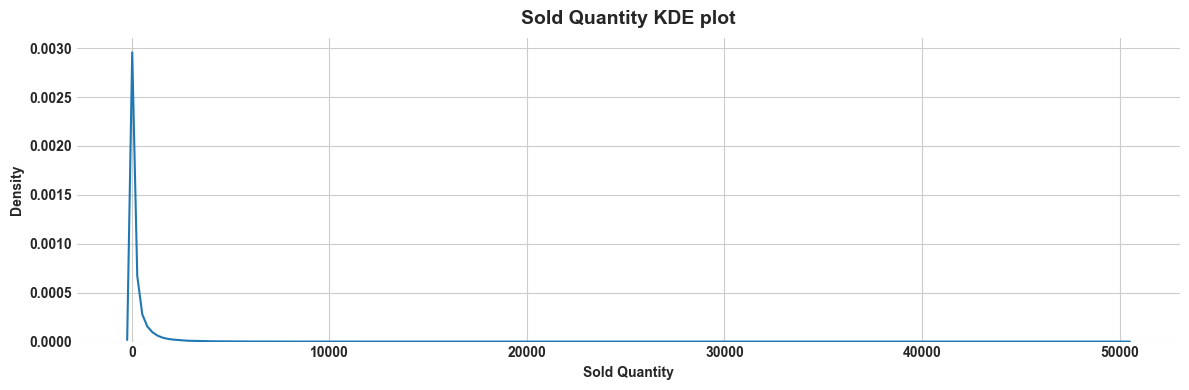

In [9]:
plt.figure(figsize=(12,4))
plt.title("Sold Quantity KDE plot")    # 
sns.kdeplot(df_sold_qty["sold_qty"])
plt.xlabel("Sold Quantity")
plt.show()

In [10]:
df_sold_qty["sold_qty"].quantile([0.90,0.95,0.99,0.999])

0.900     793.000
0.950    1318.000
0.990    3185.080
0.999    9282.534
Name: sold_qty, dtype: float64


## Q1 - Which are the TOP 100 articles in terms of sold quantity?


In [11]:

top_100_sold = df_sold_qty.iloc[:100]
top_100_sold.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [12]:
top_100_details = top_100_sold.merge(df_a, on='article_id')
top_100_details.head()

,article_id,sold_qty,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,50287,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,35043,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,372860001,31718,7p Basic Shaftless,Socks,Socks & Tights,Black,Lingeries/Tights
3,610776002,30199,Tilly (1),T-shirt,Garment Upper body,Black,Ladieswear
4,759871002,26329,Tilda tank,Vest top,Garment Upper body,Black,Divided


,prod_name,sold_qty(%)
8,Jade HW Skinny Denim TRS,18.568230
1,7p Basic Shaftless,8.539969
23,Tilly (1),8.003940
12,Luna skinny RW,6.260708
22,Tilda tank,4.002578


<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'TOP 30 most sold products')

container <BarContainer object of 24 artists>


[Text(5, 0, '18.6'),
 Text(5, 0, '8.5'),
 Text(5, 0, '8.0'),
 Text(5, 0, '6.3'),
 Text(5, 0, '4.0'),
 Text(5, 0, '3.8'),
 Text(5, 0, '3.4'),
 Text(5, 0, '3.2'),
 Text(5, 0, '3.2'),
 Text(5, 0, '3.1'),
 Text(5, 0, '3.1'),
 Text(5, 0, '3.0'),
 Text(5, 0, '2.9'),
 Text(5, 0, '2.9'),
 Text(5, 0, '2.9'),
 Text(5, 0, '2.8'),
 Text(5, 0, '2.7'),
 Text(5, 0, '2.7'),
 Text(5, 0, '2.7'),
 Text(5, 0, '2.5'),
 Text(5, 0, '2.5'),
 Text(5, 0, '2.4'),
 Text(5, 0, '2.4'),
 Text(5, 0, '2.3')]

Text(0.5, 0, 'Sold Quantity (%)')

Text(0, 0.5, '')

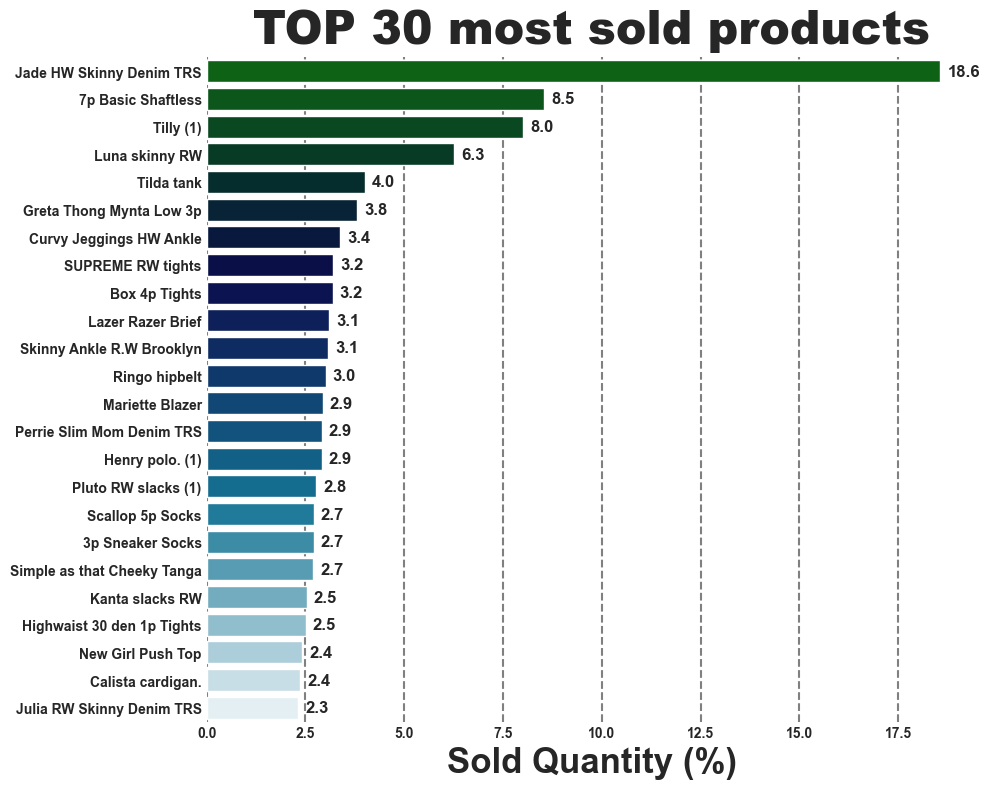

In [13]:
# top_100_details['new'] = top_100_details['prod_name'] +' ('+ top_100_details['product_group_name'] +')'
# top_100_details['new']
top_30_sold_qty_qiantile = top_100_details.iloc[:30].groupby("prod_name")["sold_qty"].sum() \
    .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)
top_30_sold_qty_qiantile.head()

plt.figure(figsize=(10,8))
plt.title("TOP 30 most sold products", fontsize=33, fontweight="extra bold")    # 그래프제목

g = sns.barplot(top_30_sold_qty_qiantile, y="prod_name", x="sold_qty(%)", palette='ocean')    # color="#00F414"

for container in g.containers:
    print('container',container)
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12)

plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'TOP 100 most sold products characteristics')

[Text(5, 0, '29.0'),
 Text(5, 0, '11.0'),
 Text(5, 0, '9.8'),
 Text(5, 0, '7.4'),
 Text(5, 0, '7.3'),
 Text(5, 0, '6.7'),
 Text(5, 0, '4.9'),
 Text(5, 0, '3.3'),
 Text(5, 0, '3.1'),
 Text(5, 0, '2.8'),
 Text(5, 0, '2.4'),
 Text(5, 0, '2.0'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.6'),
 Text(5, 0, '1.5'),
 Text(5, 0, '1.4'),
 Text(5, 0, '1.3'),
 Text(5, 0, '1.1'),
 Text(5, 0, '0.8'),
 Text(5, 0, '0.8')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Product Type')

[Text(5, 0, '37.7'),
 Text(5, 0, '29.6'),
 Text(5, 0, '24.7'),
 Text(5, 0, '3.8'),
 Text(5, 0, '2.9'),
 Text(5, 0, '1.4')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Index')

[Text(5, 0, '70.5'),
 Text(5, 0, '14.2'),
 Text(5, 0, '3.3'),
 Text(5, 0, '3.1'),
 Text(5, 0, '2.3'),
 Text(5, 0, '2.3'),
 Text(5, 0, '1.1'),
 Text(5, 0, '0.9'),
 Text(5, 0, '0.9'),
 Text(5, 0, '0.7'),
 Text(5, 0, '0.7')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Colour Group')

[Text(5, 0, '38.2'),
 Text(5, 0, '32.3'),
 Text(5, 0, '11.6'),
 Text(5, 0, '10.6'),
 Text(5, 0, '4.6'),
 Text(5, 0, '2.0'),
 Text(5, 0, '0.8')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Product Group')

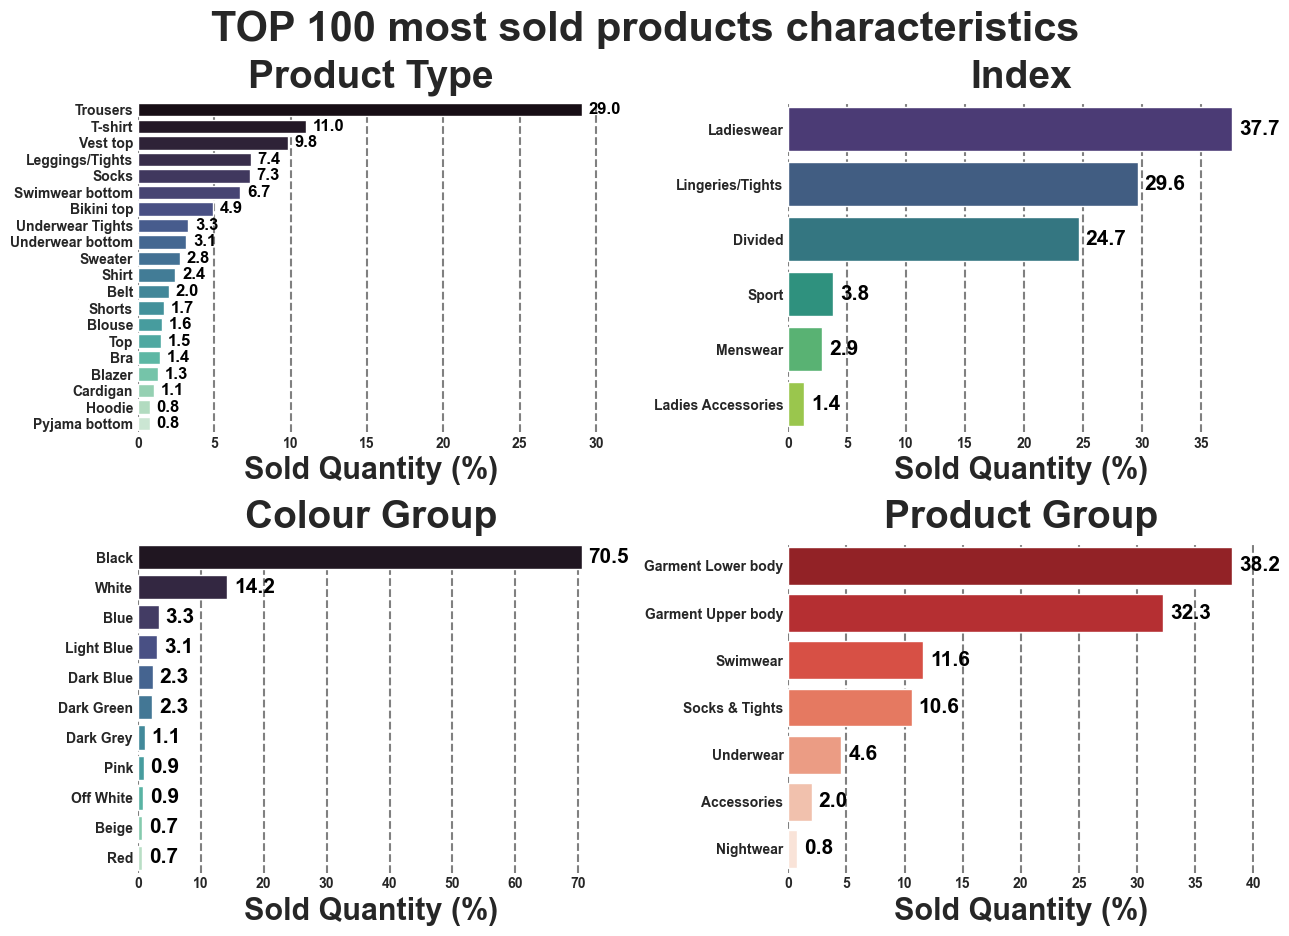

In [14]:
fig, ax = plt.subplots(2,2, figsize=(13,9.5))
plt.suptitle("TOP 100 most sold products characteristics", fontweight="bold",fontsize=30)    # Top 제목

no=100



data1 = top_100_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data1, y="product_type_name", x="sold_qty(%)", ax=ax[0,0],palette="mako")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,0].set_title("Product Type",fontweight="bold",fontsize=28)
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data2 = top_100_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data2, y="index_name", x="sold_qty(%)", ax=ax[0,1],palette="viridis")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,1].set_title("Index",fontweight="bold",fontsize=28)
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data3 = top_100_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data3, y="colour_group_name", x="sold_qty(%)", ax=ax[1,0],palette="mako")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,0].set_title("Colour Group",fontweight="bold",fontsize=28)
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data4 = top_100_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data4, y="product_group_name", x="sold_qty(%)", ax=ax[1,1],palette="Reds_r")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,1].set_title("Product Group",fontweight="bold",fontsize=28)
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 


## Q2 - Are there articles that have been sold only once?


In [15]:
df_sold_qty.head()
worst_sold = df_sold_qty[df_sold_qty["sold_qty"]==1]
worst_sold

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


,article_id,sold_qty
100056,796990001,1
100057,824983007,1
100058,597649002,1
100059,533386001,1
100060,685409001,1
...,...,...
104542,520736002,1
104543,619777003,1
104544,586904003,1
104545,512385003,1


In [16]:
worst_details = worst_sold.merge(df_a, on='article_id')
worst_details.head()
count_of_only_once_sold = worst_details.value_counts('sold_qty').values[0]    # Count of products sold only once 한번만 팔린 제품수
count_of_only_once_sold
rate = f"{count_of_only_once_sold / df_a.shape[0] * 100:.2f}%"    # rate of products sold only once
rate

,article_id,sold_qty,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,796990001,1,Bosse Fancy 5p,Socks,Socks & Tights,Pink,Baby Sizes 50-98
1,824983007,1,Benny tubescarf,Scarf,Accessories,Light Beige,Baby Sizes 50-98
2,597649002,1,W Foxglove Blouse EQ,Blouse,Garment Upper body,Light Blue,Ladieswear
3,533386001,1,Original Straight 5pkt,Trousers,Garment Lower body,Blue,Menswear
4,685409001,1,Robie printed tee,T-shirt,Garment Upper body,Yellow,Ladieswear


4491

'4.26%'

Text(0.5, 0.98, 'Characteristic of products sold only once')

[Text(5, 0, '10.0'),
 Text(5, 0, '9.0'),
 Text(5, 0, '8.0'),
 Text(5, 0, '8.0'),
 Text(5, 0, '7.0'),
 Text(5, 0, '5.0'),
 Text(5, 0, '5.0'),
 Text(5, 0, '4.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Product Type')

[Text(5, 0, '26.0'),
 Text(5, 0, '17.0'),
 Text(5, 0, '15.0'),
 Text(5, 0, '14.0'),
 Text(5, 0, '10.0'),
 Text(5, 0, '7.0'),
 Text(5, 0, '5.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '1.0')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Index')

[Text(5, 0, '16.0'),
 Text(5, 0, '13.0'),
 Text(5, 0, '8.0'),
 Text(5, 0, '7.0'),
 Text(5, 0, '7.0'),
 Text(5, 0, '5.0'),
 Text(5, 0, '4.0'),
 Text(5, 0, '4.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '2.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0'),
 Text(5, 0, '1.0')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Colour Group')

[Text(5, 0, '42.0'),
 Text(5, 0, '21.0'),
 Text(5, 0, '13.0'),
 Text(5, 0, '9.0'),
 Text(5, 0, '6.0'),
 Text(5, 0, '5.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '1.0')]

Text(0, 0.5, '')

Text(0.5, 0, 'Sold Quantity (%)')

Text(0.5, 1.0, 'Product Group')

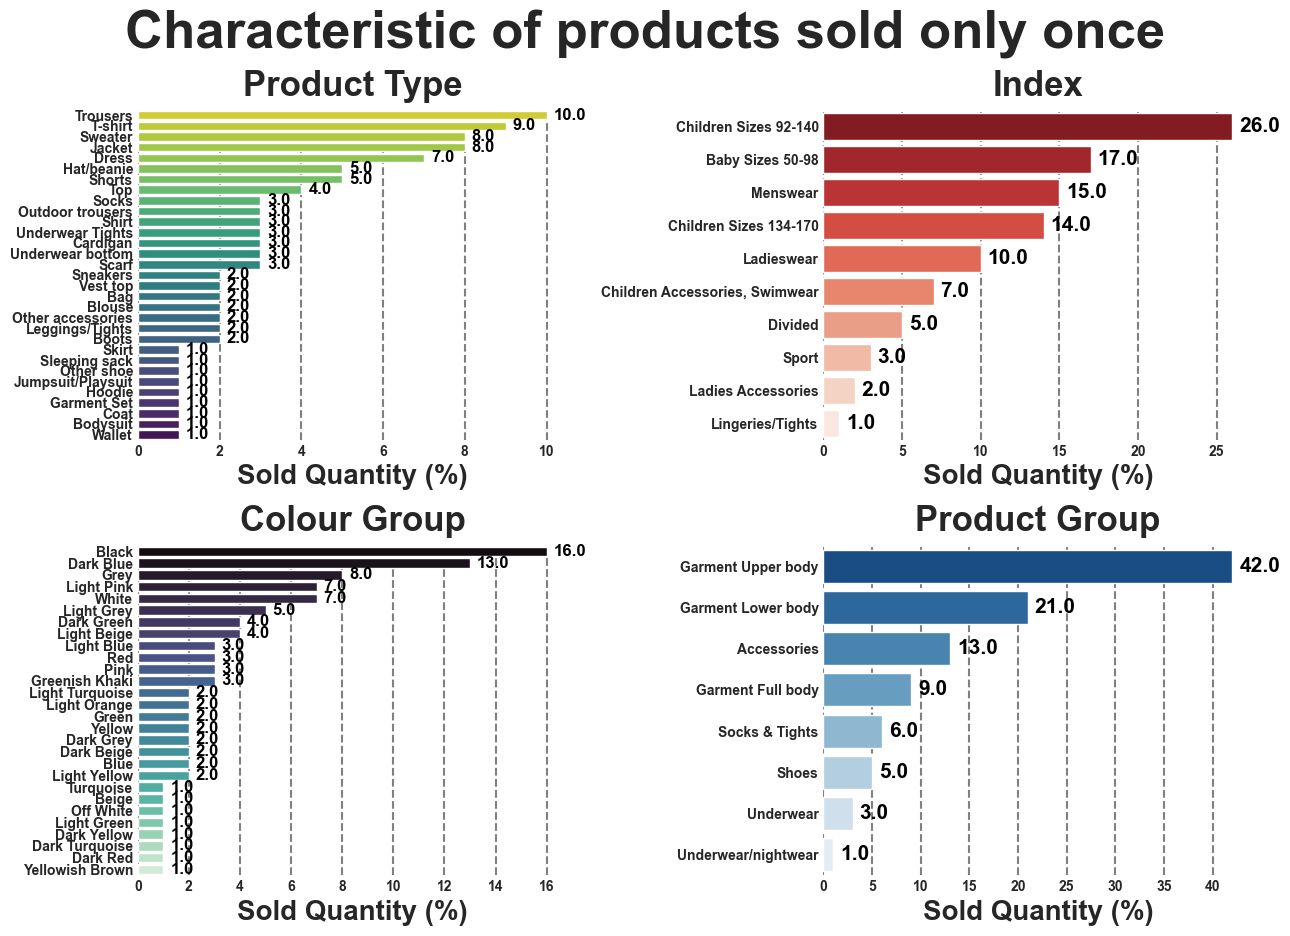

In [17]:
fig, ax = plt.subplots(2,2, figsize=(13, 9.5))
plt.suptitle("Characteristic of products sold only once", size=38, fontweight="bold")

no=100



data1 = worst_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data1, y="product_type_name", x="sold_qty(%)", ax=ax[0,0],palette="viridis_r")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,0].set_title("Product Type", size=25, fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data2 = worst_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data2, y="index_name", x="sold_qty(%)", ax=ax[0,1],palette="Reds_r")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,1].set_title("Index", size=25, fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data3 = worst_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data3, y="colour_group_name", x="sold_qty(%)", ax=ax[1,0],palette="mako")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,0].set_title("Colour Group", size=25, fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data4 = worst_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(data4, y="product_group_name", x="sold_qty(%)", ax=ax[1,1],palette="Blues_r")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,1].set_title("Product Group", size=25, fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

fig.tight_layout()

plt.show()


## Q3 - Which are the TOP 100 articles that generated most earnings for the company?


In [18]:
df_prices = df_t[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)
df_prices.rename(columns={"price":"earning"}, inplace=True)
df_prices = df_prices.reset_index()
df_prices.head()
print("Number of different sold articles:",len(df_prices["earning"]))
a = '{:,.2f}'.format(df_prices["earning"].sum())
print("Total Earnings:", a)

,article_id,earning
0,706016001,1631.732102
1,706016002,1136.321085
2,568601006,939.268593
3,448509014,781.478390
4,706016003,692.195915


Number of different sold articles: 104547
Total Earnings: 884,645.97


In [19]:
top_100_prices = df_prices.iloc[:100]
top_100_price_details = top_100_prices.merge(df_a, on='article_id')
top_100_price_details

,article_id,earning,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,1631.732102,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,1136.321085,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,568601006,939.268593,Mariette Blazer,Blazer,Garment Upper body,Black,Ladieswear
3,448509014,781.478390,Perrie Slim Mom Denim TRS,Trousers,Garment Lower body,Blue,Divided
4,706016003,692.195915,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Divided
...,...,...,...,...,...,...,...
95,573937001,258.028559,ED Madison Skinny HW,Trousers,Garment Lower body,Black,Ladieswear
96,507910001,257.567610,Isabella,Shirt,Garment Upper body,White,Ladieswear
97,554479001,257.367458,Ozzy Denim Shorts,Shorts,Garment Lower body,Black,Divided
98,399223033,256.897508,Jeggings H.W,Trousers,Garment Lower body,Dark Blue,Divided


In [20]:
# TOP 100의 매출이 전체매출의 몇퍼센트를 차지하는지?

for i in [10,50,100,200,300,400,1000]:
    print(f"The TOP {i} : {(df_prices['earning'].iloc[:i].sum() / df_prices['earning'].iloc[:].sum() * 100):.2f}% of total earnings")

The TOP 10 : 0.94% of total earnings
The TOP 50 : 2.74% of total earnings
The TOP 100 : 4.36% of total earnings
The TOP 200 : 6.75% of total earnings
The TOP 300 : 8.60% of total earnings
The TOP 400 : 10.20% of total earnings
The TOP 1000 : 17.50% of total earnings


<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'generated most earnings TOP50')

,prod_name,Earning (%)
11,Jade HW Skinny Denim TRS,18.071572
29,Shaping Skinny H.W,6.708632
15,Luna skinny RW,6.583818
16,Mariette Blazer,5.457130
21,Perrie Slim Mom Denim TRS,4.987377


Text(0.5, 0, 'Earning (%)')

Text(0, 0.5, '')

[Text(5, 0, '18.1'),
 Text(5, 0, '6.7'),
 Text(5, 0, '6.6'),
 Text(5, 0, '5.5'),
 Text(5, 0, '5.0'),
 Text(5, 0, '3.8'),
 Text(5, 0, '3.0'),
 Text(5, 0, '3.0'),
 Text(5, 0, '2.9'),
 Text(5, 0, '2.8'),
 Text(5, 0, '2.8'),
 Text(5, 0, '2.4'),
 Text(5, 0, '2.0'),
 Text(5, 0, '1.9'),
 Text(5, 0, '1.9'),
 Text(5, 0, '1.9'),
 Text(5, 0, '1.9'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.6'),
 Text(5, 0, '1.6'),
 Text(5, 0, '1.6'),
 Text(5, 0, '1.5'),
 Text(5, 0, '1.5'),
 Text(5, 0, '1.5'),
 Text(5, 0, '1.5'),
 Text(5, 0, '1.4'),
 Text(5, 0, '1.4'),
 Text(5, 0, '1.4'),
 Text(5, 0, '1.4'),
 Text(5, 0, '1.4'),
 Text(5, 0, '1.4')]

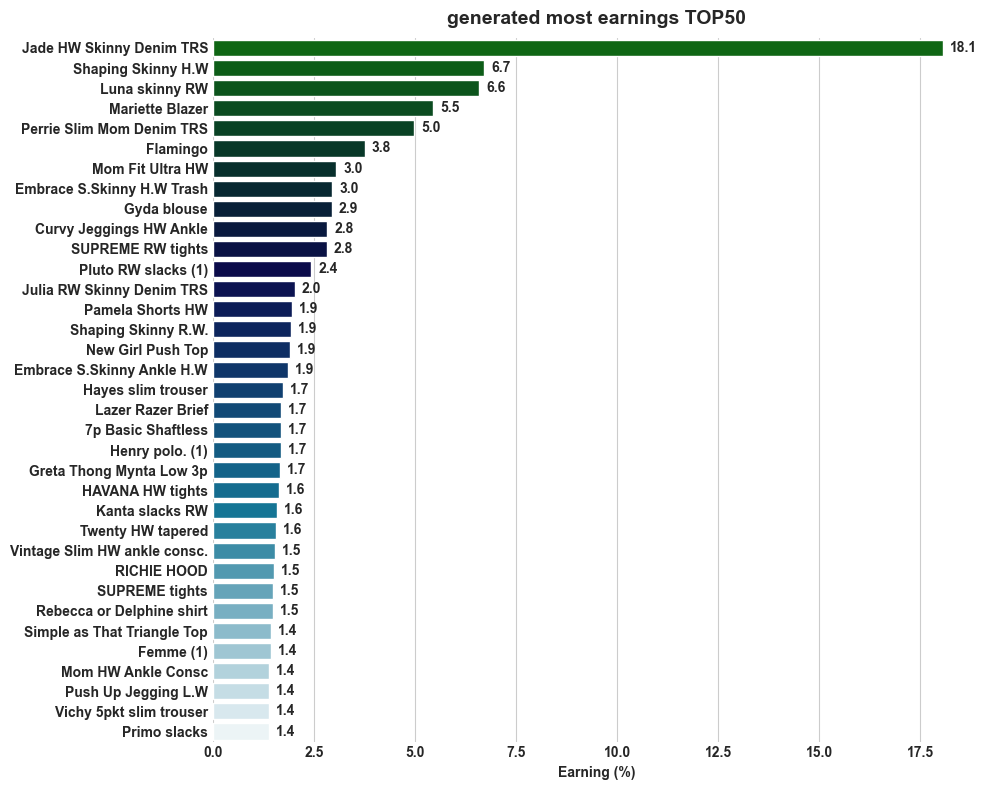

In [21]:
plt.figure(figsize=(10,8))
plt.title('generated most earnings TOP50')

data = top_100_price_details.iloc[:50].groupby('prod_name')['earning'].sum().transform(lambda x:x/x.sum()*100) \
.rename('Earning (%)').reset_index().sort_values(by='Earning (%)',ascending=False)
data.head()
ax = sns.barplot(data, x='Earning (%)', y='prod_name', palette='ocean')
plt.xlabel('Earning (%)')
plt.ylabel('')
for container in ax.containers:
    ax.bar_label(container, padding = 5, fmt='%.1f', fontsize=10)

plt.show()


Text(0.5, 0.98, 'generated most earnings TOP50 characteristics')

[Text(5, 0, '60.6'),
 Text(5, 0, '5.5'),
 Text(5, 0, '4.9'),
 Text(5, 0, '3.8'),
 Text(5, 0, '3.7'),
 Text(5, 0, '3.6'),
 Text(5, 0, '2.6'),
 Text(5, 0, '2.2'),
 Text(5, 0, '1.9'),
 Text(5, 0, '1.8'),
 Text(5, 0, '1.8'),
 Text(5, 0, '1.7'),
 Text(5, 0, '1.6'),
 Text(5, 0, '1.5'),
 Text(5, 0, '1.1'),
 Text(5, 0, '1.1'),
 Text(5, 0, '0.7')]

Text(0, 0.5, '')

Text(0.5, 0, 'Earnings (%)')

Text(0.5, 1.0, 'Product Type')

[Text(5, 0, '45.5'),
 Text(5, 0, '37.1'),
 Text(5, 0, '10.5'),
 Text(5, 0, '4.5'),
 Text(5, 0, '1.7'),
 Text(5, 0, '0.7')]

Text(0, 0.5, '')

Text(0.5, 0, 'Earnings (%)')

Text(0.5, 1.0, 'Index')

[Text(5, 0, '54.8'),
 Text(5, 0, '12.4'),
 Text(5, 0, '11.4'),
 Text(5, 0, '8.5'),
 Text(5, 0, '4.9'),
 Text(5, 0, '3.0'),
 Text(5, 0, '2.8'),
 Text(5, 0, '1.6'),
 Text(5, 0, '0.7')]

Text(0, 0.5, '')

Text(0.5, 0, 'Earnings (%)')

Text(0.5, 1.0, 'Colour Group')

[Text(5, 0, '66.2'),
 Text(5, 0, '22.6'),
 Text(5, 0, '6.2'),
 Text(5, 0, '2.5'),
 Text(5, 0, '1.8'),
 Text(5, 0, '0.7')]

Text(0, 0.5, '')

Text(0.5, 0, 'Earnings (%)')

Text(0.5, 1.0, 'Product Group')

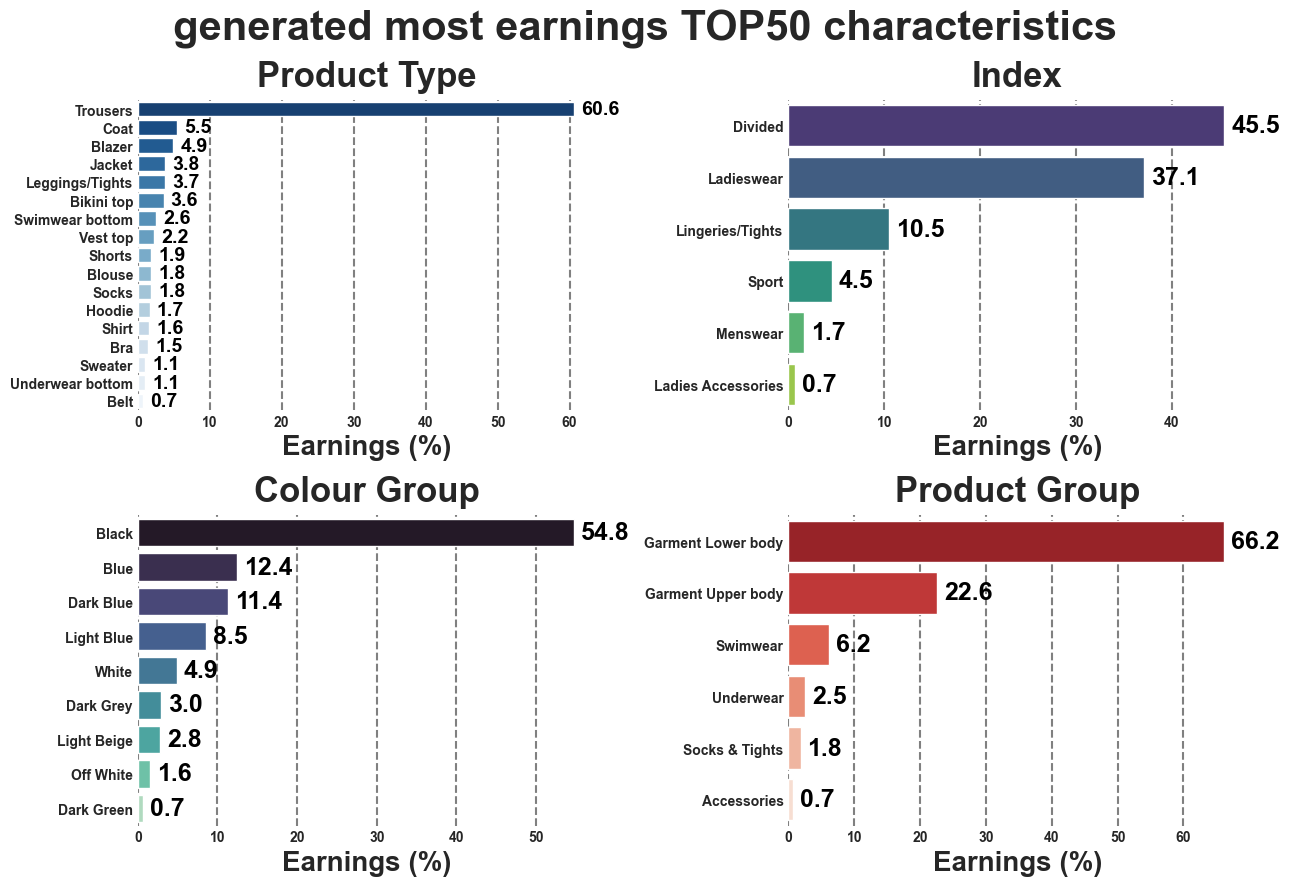

In [22]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("generated most earnings TOP50 characteristics", fontweight="bold", fontsize=30)

no=100



data1 = top_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)",ascending=False)

g = sns.barplot(data1, y="product_type_name", x="earning(%)", ax=ax[0,0], palette="Blues_r")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=14, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data2 = top_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data2, y="index_name", x="earning(%)", ax=ax[0,1], palette="viridis")
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding = 5, fontsize=18, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data3 = top_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data3, y="colour_group_name", x="earning(%)", ax=ax[1,0],palette="mako")
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



data4 = top_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data4, y="product_group_name", x="earning(%)", ax=ax[1,1],palette="Reds_r")
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding=5, fontsize=18, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 



## Q4 - Which are articles that generated lower earnings for the company?



In [23]:
worst_100_prices = df_prices.iloc[-100:]
worst_100_price_details = worst_100_prices.merge(df_a, on='article_id')
worst_100_price_details

,article_id,earning,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,555293002,0.002136,Elin thin hair elastic,Hair string,Accessories,Light Pink,Divided
1,502262002,0.002119,Kelly mittens,Gloves,Accessories,Light Grey,Baby Sizes 50-98
2,585716001,0.002034,Festival dress,Dress,Garment Full body,Light Orange,Children Sizes 134-170
3,807241091,0.001864,1p Fun Socks,Socks,Socks & Tights,Light Grey,Lingeries/Tights
4,551413003,0.001695,DANTE set,Garment Set,Garment Full body,Light Blue,Baby Sizes 50-98
...,...,...,...,...,...,...,...
95,407663007,0.000678,Class Jacob studpk,Earring,Accessories,Other Pink,Ladies Accessories
96,520431003,0.000678,Jolly top,T-shirt,Garment Upper body,Light Orange,Ladieswear
97,405310006,0.000475,Ciara sunglasses,Sunglasses,Accessories,Yellowish Brown,Divided
98,569052001,0.000441,H-clip 2pk watermelon,Hair clip,Accessories,Other Pink,"Children Accessories, Swimwear"


In [24]:
# Worst 100의 매출이 전체매출의 몇퍼센트를 차지하는지?

for i in [100,1000,10000,41000]:
    print(f"The Worst {i} : {100-(df_prices['earning'].iloc[:-i].sum()/df_prices['earning'].iloc[:].sum() * 100):.3f}% of total earnings")

The Worst 100 : 0.000% of total earnings
The Worst 1000 : 0.001% of total earnings
The Worst 10000 : 0.032% of total earnings
The Worst 41000 : 1.043% of total earnings


Text(0.5, 1, 'Worst 100 products characteristics')

[Text(0, 0, '17.4'),
 Text(0, 0, '12.5'),
 Text(0, 0, '10.1'),
 Text(0, 0, '9.1'),
 Text(0, 0, '8.2'),
 Text(0, 0, '4.6'),
 Text(0, 0, '3.7'),
 Text(0, 0, '3.4'),
 Text(0, 0, '3.4'),
 Text(0, 0, '3.2'),
 Text(0, 0, '2.3'),
 Text(0, 0, '2.3'),
 Text(0, 0, '2.3'),
 Text(0, 0, '2.1'),
 Text(0, 0, '2.0'),
 Text(0, 0, '1.7'),
 Text(0, 0, '1.5'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.3')]

Text(0.5, 0, '')

Text(0, 0.5, 'Earnings (%)')

[Text(0, 0, 'T-shirt'),
 Text(1, 0, 'Socks'),
 Text(2, 0, 'Hair string'),
 Text(3, 0, 'Vest top'),
 Text(4, 0, 'Other accessories'),
 Text(5, 0, 'Top'),
 Text(6, 0, 'Dress'),
 Text(7, 0, 'Bag'),
 Text(8, 0, 'Hair/alice band'),
 Text(9, 0, 'Hair clip'),
 Text(10, 0, 'Blouse'),
 Text(11, 0, 'Sweater'),
 Text(12, 0, 'Underwear bottom'),
 Text(13, 0, 'Shorts'),
 Text(14, 0, 'Gloves'),
 Text(15, 0, 'Necklace'),
 Text(16, 0, 'Hat/beanie'),
 Text(17, 0, 'Hat/brim'),
 Text(18, 0, 'Bra'),
 Text(19, 0, 'Garment Set'),
 Text(20, 0, 'Bracelet'),
 Text(21, 0, 'Trousers'),
 Text(22, 0, 'Scarf'),
 Text(23, 0, 'Leggings/Tights'),
 Text(24, 0, 'Belt'),
 Text(25, 0, 'Fine cosmetics'),
 Text(26, 0, 'Earring'),
 Text(27, 0, 'Sunglasses')]

Text(0.5, 1.0, 'Product Type')

[Text(0, 0, '12.3'),
 Text(0, 0, '10.1'),
 Text(0, 0, '7.8'),
 Text(0, 0, '7.6'),
 Text(0, 0, '6.5'),
 Text(0, 0, '5.6'),
 Text(0, 0, '4.9'),
 Text(0, 0, '4.4'),
 Text(0, 0, '4.0'),
 Text(0, 0, '3.9'),
 Text(0, 0, '3.4'),
 Text(0, 0, '3.4'),
 Text(0, 0, '2.9'),
 Text(0, 0, '2.3'),
 Text(0, 0, '1.8'),
 Text(0, 0, '1.7'),
 Text(0, 0, '1.6'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.2'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '1.1'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.3')]

Text(0, 0.5, 'Earnings (%)')

Text(0.5, 0, '')

[Text(0, 0, 'Black'),
 Text(1, 0, 'Light Pink'),
 Text(2, 0, 'White'),
 Text(3, 0, 'Dark Blue'),
 Text(4, 0, 'Grey'),
 Text(5, 0, 'Other Pink'),
 Text(6, 0, 'Light Blue'),
 Text(7, 0, 'Light Grey'),
 Text(8, 0, 'Gold'),
 Text(9, 0, 'Light Orange'),
 Text(10, 0, 'Dark Green'),
 Text(11, 0, 'Dark Red'),
 Text(12, 0, 'Off White'),
 Text(13, 0, 'Light Purple'),
 Text(14, 0, 'Light Yellow'),
 Text(15, 0, 'Green'),
 Text(16, 0, 'Pink'),
 Text(17, 0, 'Red'),
 Text(18, 0, 'Purple'),
 Text(19, 0, 'Light Turquoise'),
 Text(20, 0, 'Dark Grey'),
 Text(21, 0, 'Turquoise'),
 Text(22, 0, 'Yellow'),
 Text(23, 0, 'Dark Purple'),
 Text(24, 0, 'Greenish Khaki'),
 Text(25, 0, 'Blue'),
 Text(26, 0, 'Silver'),
 Text(27, 0, 'Transparent'),
 Text(28, 0, 'Other Yellow'),
 Text(29, 0, 'Beige'),
 Text(30, 0, 'Other Red'),
 Text(31, 0, 'Light Green'),
 Text(32, 0, 'Yellowish Brown')]

Text(0.5, 1.0, 'Colour Group')

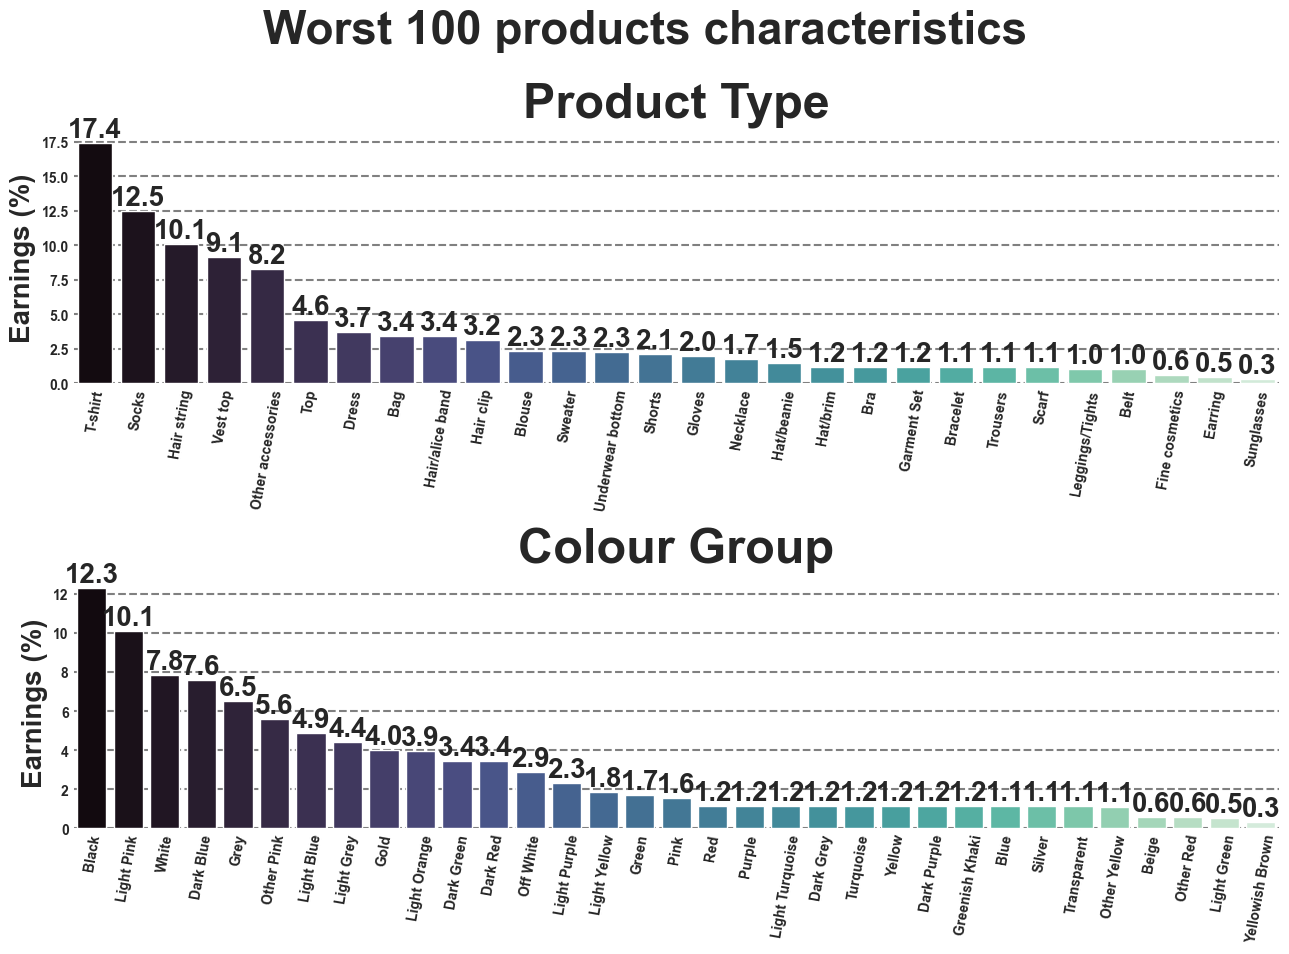

In [25]:
fig, ax = plt.subplots(2,1, figsize=(13,9.5))
plt.suptitle("Worst 100 products characteristics", fontsize=33 ,fontweight="bold", y=1)

no=100

data1 = worst_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data1, x="product_type_name", y="earning(%)", ax=ax[0],palette="mako")
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=20)
ax[0].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax[0].set_xlabel("")
ax[0].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[0].set_title("Product Type", size=35,fontweight="bold")



data2 = worst_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data2, x="colour_group_name", y="earning(%)", ax=ax[1],palette="mako")
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=20)
ax[1].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_xlabel("")
ax[1].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[1].set_title("Colour Group", size=35,fontweight="bold")
ax[1].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)

fig.tight_layout()
plt.show()


Text(0.5, 1, 'Worst 100 products characteristics (2)')

[Text(0, 0, '38.4'),
 Text(0, 0, '14.5'),
 Text(0, 0, '9.1'),
 Text(0, 0, '8.1'),
 Text(0, 0, '7.0'),
 Text(0, 0, '6.9'),
 Text(0, 0, '6.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '0.9')]

Text(0, 0.5, '')

Text(0.5, 0, 'Earnings (%)')

Text(0.5, 1.0, 'Index')

[Text(0, 0, '38.7'),
 Text(0, 0, '35.7'),
 Text(0, 0, '12.5'),
 Text(0, 0, '4.8'),
 Text(0, 0, '4.3'),
 Text(0, 0, '3.4'),
 Text(0, 0, '0.6')]

Text(0, 0.5, '')

Text(0.5, 0, 'Earnings (%)')

Text(0.5, 1.0, 'Product Group')

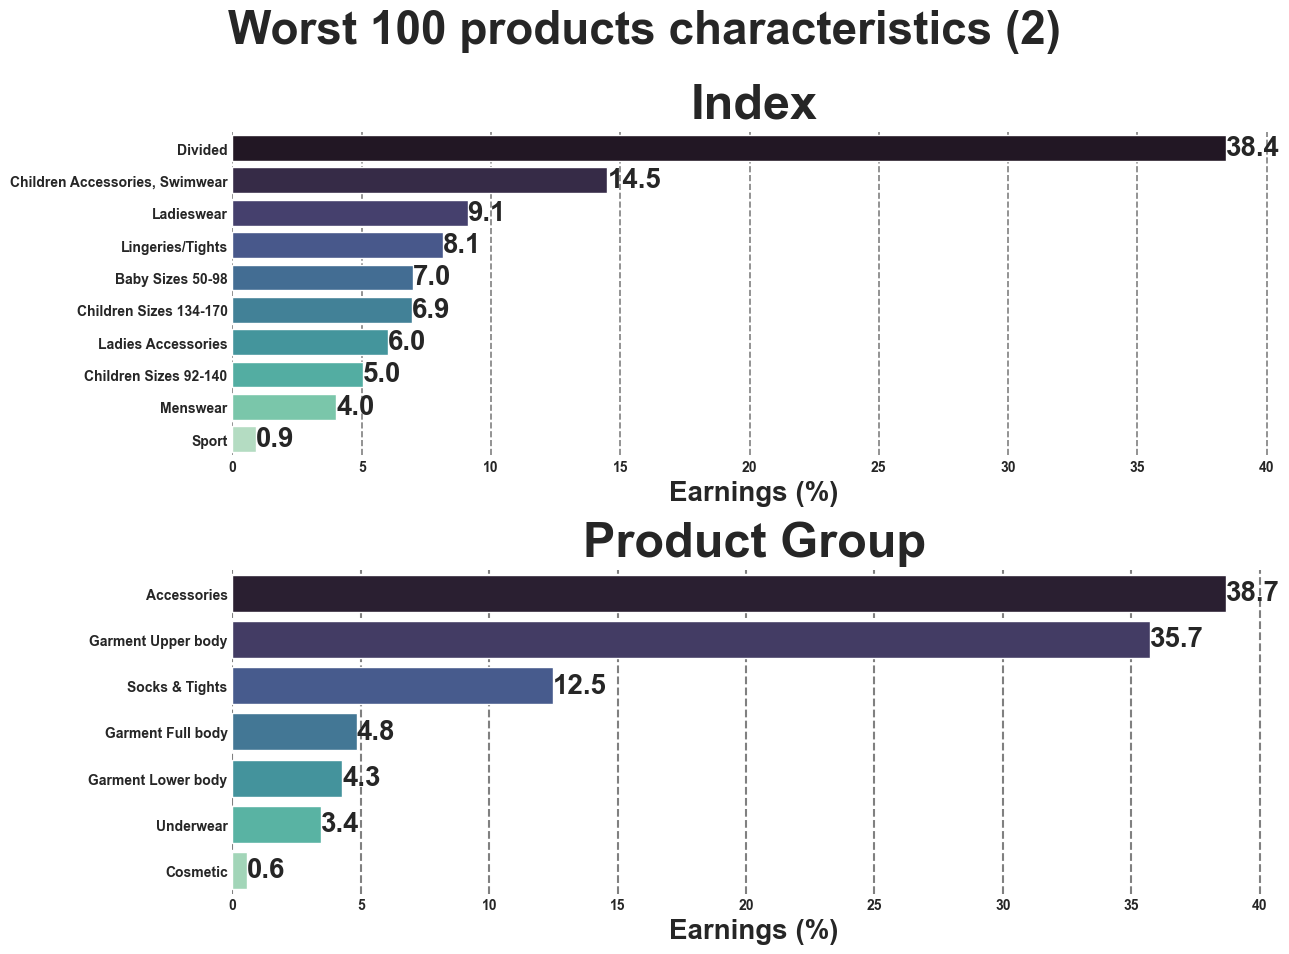

In [26]:
fig, ax = plt.subplots(2,1, figsize=(13,9.5))
plt.suptitle("Worst 100 products characteristics (2)", fontsize=33 ,fontweight="bold", y=1)

no=100

data3 = worst_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data3, y="index_name", x="earning(%)", ax=ax[0],palette="mako")
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=20)
ax[0].set_ylabel("")
ax[0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_title("Index",size=35,fontweight="bold")
ax[0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.2)



data4 = worst_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False)

g = sns.barplot(data4, y="product_group_name", x="earning(%)", ax=ax[1],palette="mako")
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=20)
ax[1].set_ylabel("")
ax[1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_title("Product Group", size=35,fontweight="bold")
ax[1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
             
plt.tight_layout()
             
plt.show()

# Customer Analayis
고객 분석

In [27]:
df_t.head()

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932


In [28]:
# 고객별 총 구매금액
df_cust_prices = df_t[["customer_id", "price"]].groupby("customer_id").sum()
df_cust_prices.head()

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695


In [29]:
# 고객별 총 구매수량
df_cust_qty = df_t[["customer_id", "article_id"]].groupby("customer_id").count()
df_cust_qty.head()

,article_id
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13


In [30]:
# 위 2개 Merge
cust_qty_price = pd.merge(df_cust_prices, df_cust_qty, on='customer_id')
cust_qty_price.head()

,price,article_id
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695,13


In [31]:
df_c.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [32]:
# 위 DF에 고객정보 Merge
cust_details = pd.merge(cust_qty_price, df_c.drop("postal_code", axis=1), on='customer_id', how='inner')
cust_details.head()

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0


In [33]:
print(f"In total there are {len(cust_details)} different customers")

In total there are 1362281 different customers


## Purchased Quantity by Customer Analysis

In [34]:
cust_details.article_id.describe()

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: article_id, dtype: float64

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.676407,1895,NaN,NaN,ACTIVE,NONE,31.0
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.662000,1441,1.0,1.0,ACTIVE,Regularly,25.0
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,30.126814,1364,NaN,NaN,ACTIVE,NONE,28.0
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.921186,1361,1.0,1.0,ACTIVE,Regularly,61.0
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,41.327051,1237,1.0,1.0,ACTIVE,Regularly,68.0
...,...,...,...,...,...,...,...,...
832233,9c7945de9cd5a5d7f833476ee2d7739e82b180a2026b5c...,0.013542,1,NaN,NaN,ACTIVE,NONE,62.0
234335,2c0f5a51c0b29188a119bdd358897f279b1dda4ba0194b...,0.050831,1,NaN,NaN,ACTIVE,NONE,27.0
234337,2c0f6e18e2e825f006126fc8be1117928fa24d5810857a...,0.053373,1,1.0,1.0,ACTIVE,Regularly,41.0
832215,9c784d9b315f5c761a2f6c267f88d7f9bb4d8597b7983f...,0.030492,1,1.0,1.0,ACTIVE,Regularly,36.0


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Distribution of purchased quantity by customer')

<Axes: title={'center': 'Distribution of purchased quantity by customer'}, xlabel='article_id', ylabel='Density'>

Text(0.5, 0, 'purchased quantity')

Text(0, 0.5, 'Count')

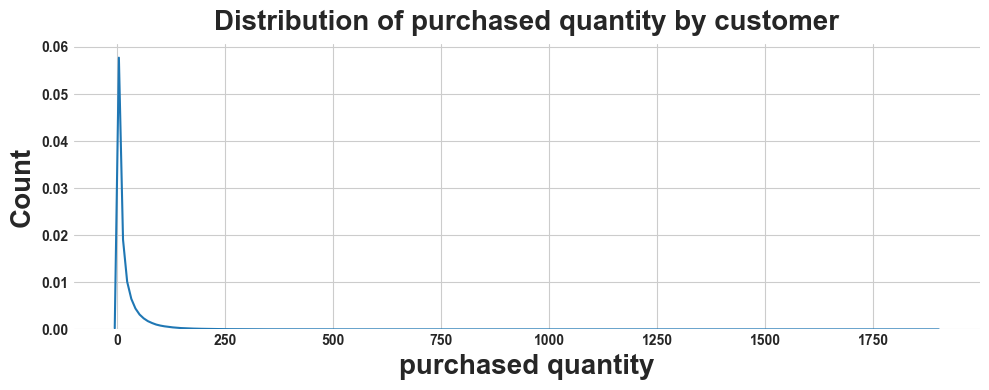

In [35]:
cust_details.sort_values(by='article_id',ascending=False)
plt.figure(figsize=(10,4))
plt.title("Distribution of purchased quantity by customer", fontweight="bold", size=20)
sns.kdeplot(cust_details["article_id"])
plt.xlabel("purchased quantity",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.show()

## Purchase Behaviors according to Age

,age
0,49.0
1,25.0
2,24.0
3,54.0
4,52.0


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Customers age distribution')

(array([9.23800e+03, 2.40090e+04, 3.72650e+04, 5.46380e+04, 6.69320e+04,
        1.05965e+05, 5.57800e+04, 5.46820e+04, 5.33530e+04, 4.88280e+04,
        8.45100e+04, 3.90130e+04, 3.61450e+04, 2.81890e+04, 2.46620e+04,
        2.16270e+04, 3.71280e+04, 1.59370e+04, 1.51510e+04, 1.48120e+04,
        1.60720e+04, 3.30710e+04, 1.73020e+04, 1.84770e+04, 1.95520e+04,
        2.17750e+04, 4.88150e+04, 2.77330e+04, 2.87600e+04, 2.95610e+04,
        2.77770e+04, 2.50230e+04, 4.55540e+04, 2.02560e+04, 1.83490e+04,
        1.59040e+04, 1.36810e+04, 2.32970e+04, 9.36100e+03, 8.08700e+03,
        7.02300e+03, 5.98700e+03, 5.42500e+03, 9.05800e+03, 3.81100e+03,
        3.25300e+03, 2.98200e+03, 2.57900e+03, 4.21200e+03, 1.51400e+03,
        1.04000e+03, 7.91000e+02, 5.73000e+02, 9.00000e+02, 2.93000e+02,
        2.14000e+02, 1.24000e+02, 1.13000e+02, 9.50000e+01, 9.00000e+01,
        4.80000e+01, 2.30000e+01, 2.40000e+01, 1.60000e+01, 2.10000e+01,
        3.00000e+00, 1.00000e+01, 3.00000e+00, 4.00

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

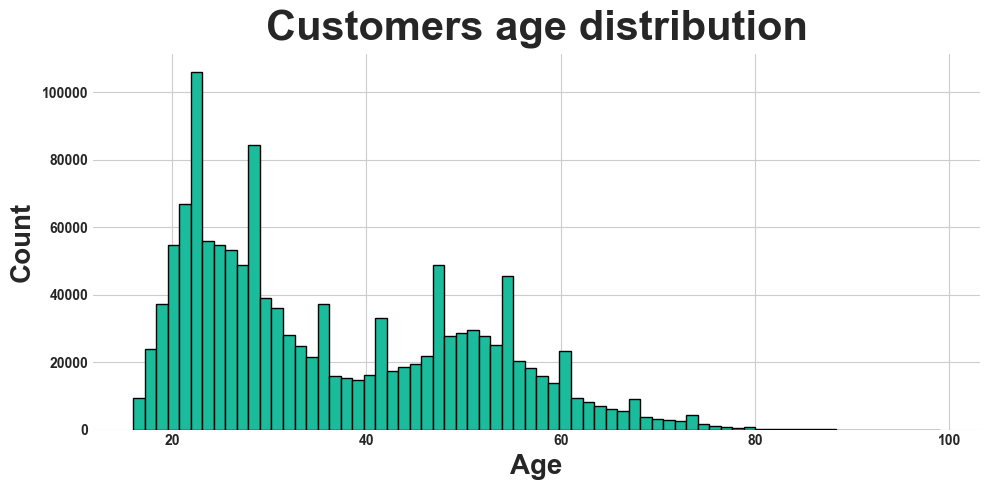

In [36]:
pd.DataFrame(cust_details["age"]).head()

plt.figure(figsize=(10,5))
plt.title("Customers age distribution", fontweight="bold", size=30)
plt.hist(cust_details["age"], bins=70, edgecolor="black", color="#1ABC9C")
plt.xlabel("Age",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.show()

## Q5 - Which age group purchase more articles?

In [37]:
cust_details['age_groups'] = pd.cut(cust_details['age'], bins=[0, 20, 30, 40,50, 60, 70, float('Inf')], \
                                                   labels=['10s', '20s','30s','40s','50s','60s' , '70+'])
cust_details

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age,age_groups
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0,40s
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0,20s
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0,20s
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0,50s
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0,50s
...,...,...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,1.292356,51,NaN,NaN,ACTIVE,NONE,24.0,20s
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,1.807322,84,NaN,NaN,ACTIVE,NONE,21.0,20s
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0.788932,45,1.0,1.0,ACTIVE,Regularly,21.0,20s
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0.209203,7,1.0,1.0,ACTIVE,Regularly,18.0,10s


<Figure size 1300x950 with 0 Axes>

Text(0.5, 1.0, 'Purchased quantity rate by age group\n')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Purchased Quantity (%)')

[Text(0, 5, '4.7'),
 Text(0, 5, '42.5'),
 Text(0, 5, '17.8'),
 Text(0, 5, '16.5'),
 Text(0, 5, '14.8'),
 Text(0, 5, '3.2'),
 Text(0, 5, '0.6')]

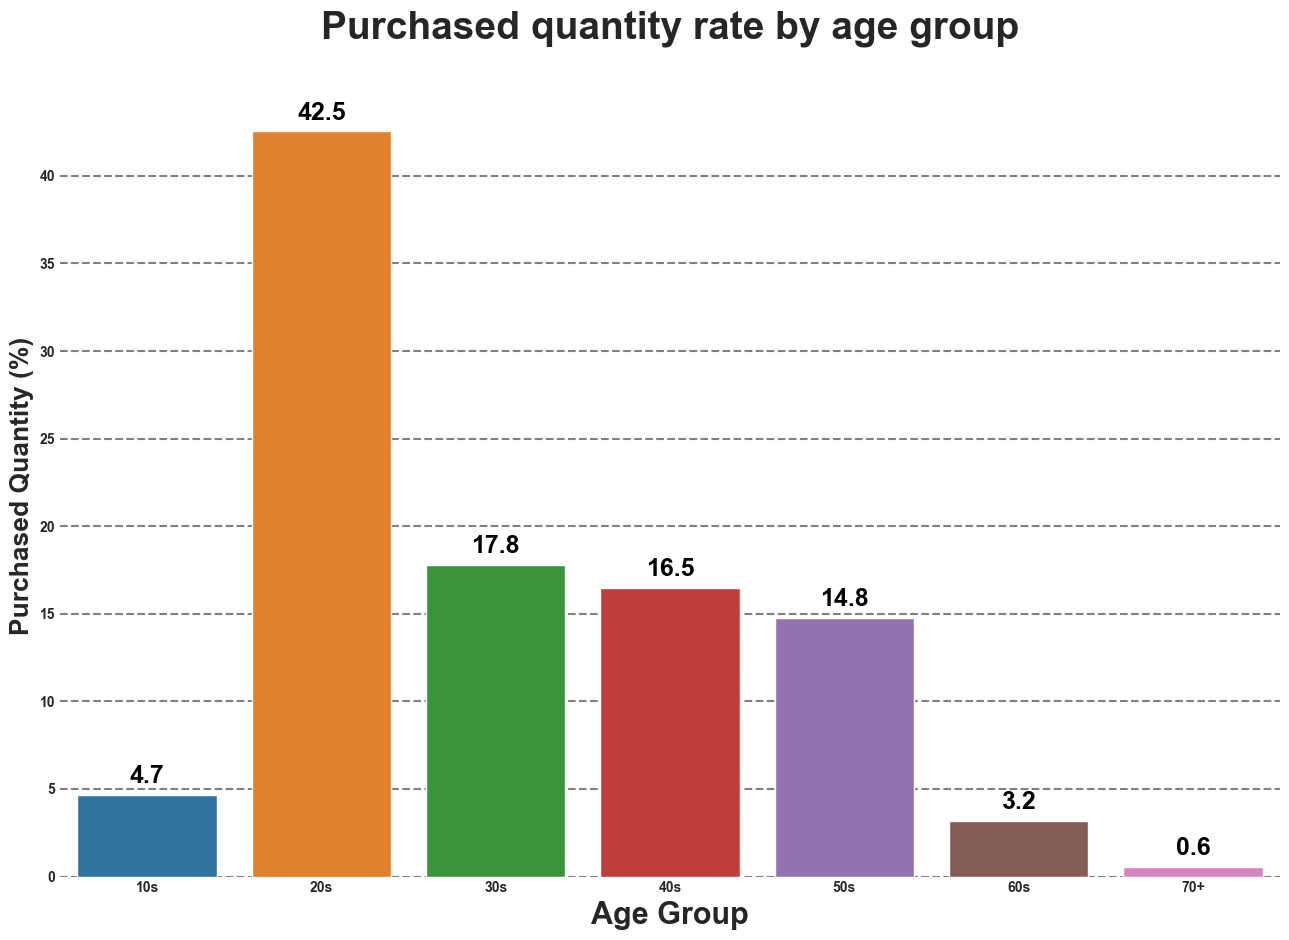

In [38]:
plt.figure(figsize=(13,9.5))
plt.title("Purchased quantity rate by age group\n", fontweight="bold", size=28)


data = cust_details.groupby("age_groups")["article_id"].sum() \
.transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index()

g = sns.barplot(data, x="age_groups", y="Purchased Quantity(%)") # edgecolor="black"
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Purchased Quantity (%)",fontweight="bold", size=19)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

## Q6 - Which age group generates more earnings for the company?

<Figure size 1300x950 with 0 Axes>

Text(0.5, 1.0, 'Company Earnings rate by age group\n')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Earnings (%)')

[Text(0, 5, '4.0'),
 Text(0, 5, '41.9'),
 Text(0, 5, '17.9'),
 Text(0, 5, '16.4'),
 Text(0, 5, '15.7'),
 Text(0, 5, '3.5'),
 Text(0, 5, '0.6')]

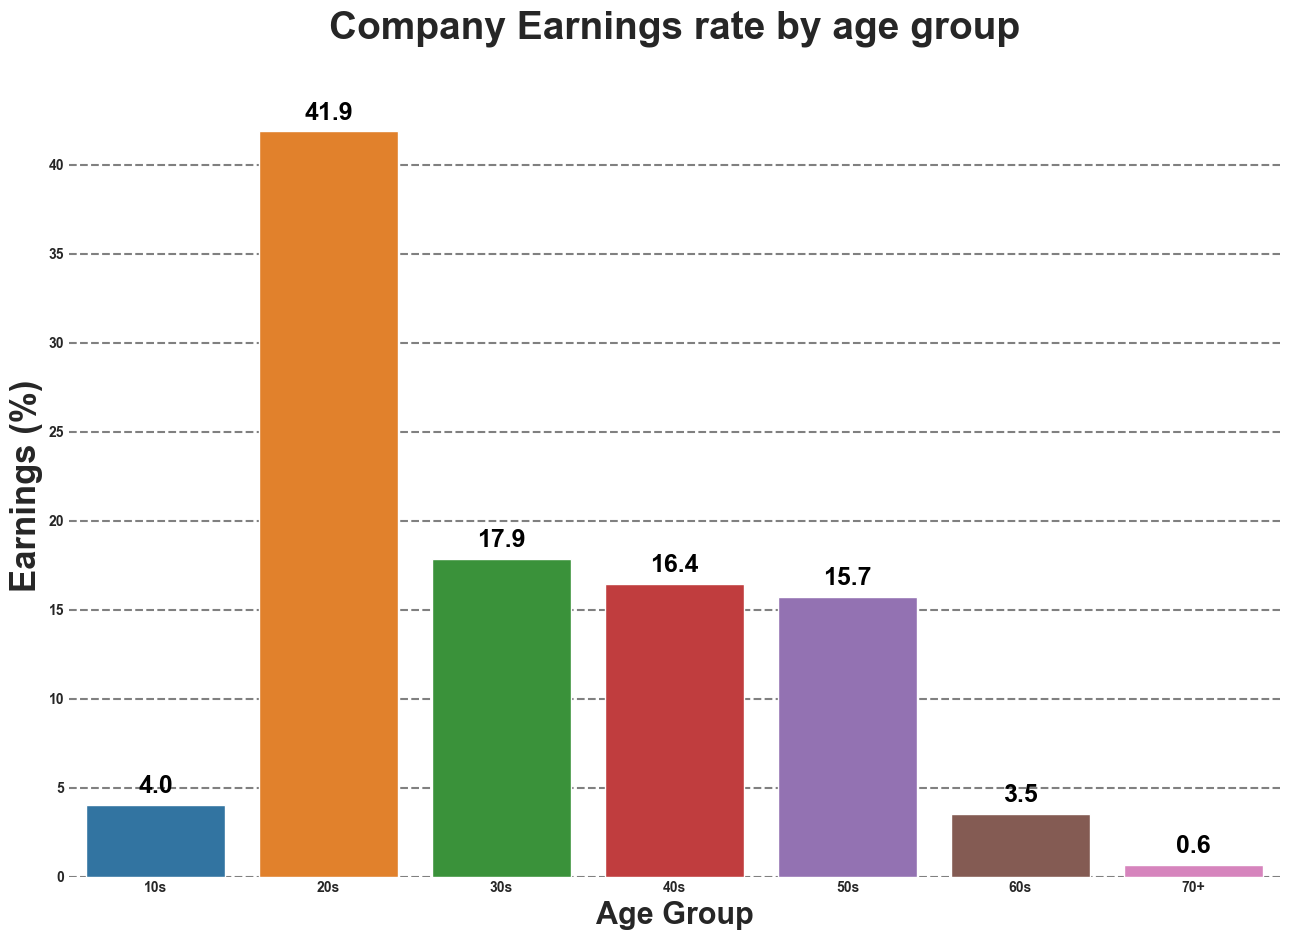

In [39]:
plt.figure(figsize=(13,9.5))
plt.title("Company Earnings rate by age group\n", fontweight="bold", size=28)


data = cust_details.groupby("age_groups")["price"].sum().transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index()

g = sns.barplot(data, x="age_groups", y="earning(%)")
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Earnings (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

## Q7 - Does the club member status influence the purchased quantity?

In [40]:
cust_details["club_member_status"].value_counts(normalize=True)

ACTIVE        0.931395
PRE-CREATE    0.068261
LEFT CLUB     0.000344
Name: club_member_status, dtype: float64

In [41]:
cust_details.groupby("club_member_status")["article_id"].sum()

club_member_status
ACTIVE        31057401
LEFT CLUB         8539
PRE-CREATE      660219
Name: article_id, dtype: int64

In [42]:
print("The average quantity of purchased products by the customers is {:.0f} products ".format(cust_details["article_id"].mean()))
cust_details.head()
cust_details.groupby("club_member_status")["article_id"].mean()
print("The average quantity of purchased products by the ACTIVE customers is {:.1f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["ACTIVE"]))
print("The average quantity of purchased products by the LEFT-CLUB customers is {:.1f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["LEFT CLUB"]))
print("The average quantity of purchased products by the PRE-CREATE customers is {:.1f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["PRE-CREATE"]))

The average quantity of purchased products by the customers is 23 products 


,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age,age_groups
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0,40s
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0,20s
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0,20s
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0,50s
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0,50s


club_member_status
ACTIVE        24.586620
LEFT CLUB     18.324034
PRE-CREATE     7.131489
Name: article_id, dtype: float64

The average quantity of purchased products by the ACTIVE customers is 24.6 products 
The average quantity of purchased products by the LEFT-CLUB customers is 18.3 products 
The average quantity of purchased products by the PRE-CREATE customers is 7.1 products 


<Figure size 900x500 with 0 Axes>

Text(0.5, 1.0, 'Average Purchased Quantity by Club Member Status\n')

Text(0.76, 23.7, 'Mean Purchased Quantity: 23')

Text(0.5, 0, 'Club Member Status')

Text(0, 0.5, 'Average Purchased Quantity')

[Text(0, 5, '24'), Text(0, 5, '18'), Text(0, 5, '7')]

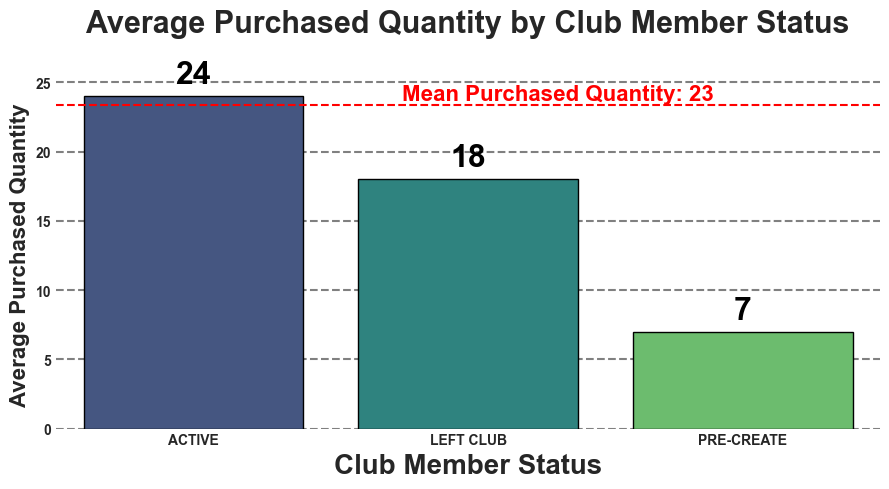

In [43]:
plt.figure(figsize=(9,5))
plt.title("Average Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)


data = cust_details.groupby("club_member_status")["article_id"].mean().astype(int).reset_index()

g = sns.barplot(data, x="club_member_status", y="article_id", palette="viridis", edgecolor="black")



plt.axhline(y = cust_details["article_id"].mean(), color = 'r', linestyle = '--')
plt.text(0.76, 23.7, 'Mean Purchased Quantity: {:.0f}'.format(cust_details["article_id"].mean()), size=16, color="red",fontweight="bold")


plt.xlabel("Club Member Status",fontweight="bold", size=20)
plt.ylabel("Average Purchased Quantity",fontweight="bold", size=16)


for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")

plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

<Figure size 900x500 with 0 Axes>

Text(0.5, 1.0, 'Median Purchased Quantity by Club Member Status\n')

Text(0.76, 9.3, 'Median Purchased Quantity: 9.00')

Text(0.5, 0, 'Club Member Status')

Text(0, 0.5, 'Median Purchaed Quantity')

[Text(0, 5, '10'), Text(0, 5, '7'), Text(0, 5, '4')]

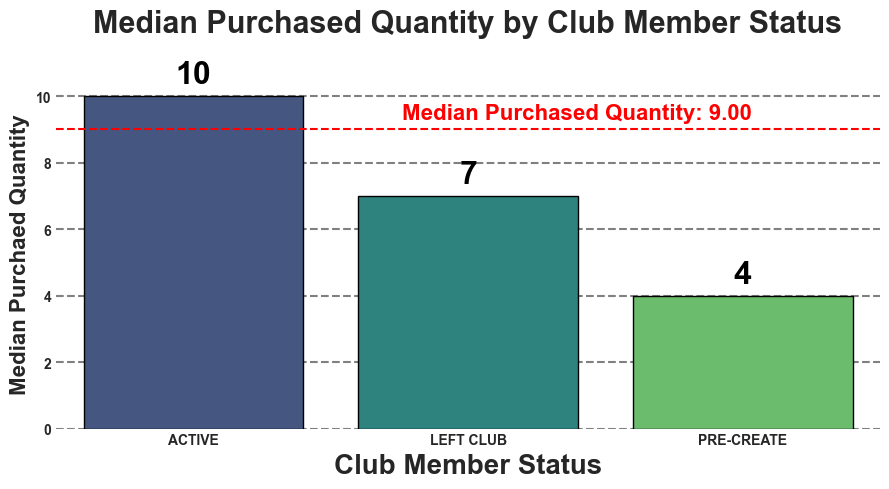

In [44]:

plt.figure(figsize=(9,5))
plt.title("Median Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)



data = cust_details.groupby("club_member_status")["article_id"].median().reset_index()

g = sns.barplot(data, x="club_member_status", y="article_id", palette="viridis", edgecolor="black")


plt.axhline(y = cust_details["article_id"].median(), color = 'r', linestyle = '--')
plt.text(0.76, 9.3, 'Median Purchased Quantity: {:.2f}'.format(cust_details["article_id"].median()), size=16, color="red",fontweight="bold")


plt.xlabel("Club Member Status",fontweight="bold", size=20)
plt.ylabel("Median Purchaed Quantity",fontweight="bold", size=16)


for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")
    
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

# 개인과제

## 카테고리 선택으로 제품추천

df_a, df_t, df_c

In [45]:
df_t.columns
df_a.columns
df_c.columns
categorical = df_t.merge(df_a, on='article_id')
categorical = categorical.merge(df_c[['customer_id','age']], on='customer_id')
categorical['age_group'] = pd.cut(categorical['age'], bins=[0, 20, 30, 40,50, 60, 70, float('Inf')], \
                                                   labels=['10s', '20s','30s','40s','50s','60s' , '70+'])
categorical

make_count = categorical.value_counts(['age_group','article_id']).reset_index(['age_group','article_id']) \
.sort_values(by=['age_group',0] , ascending=[True,False])
make_count.columns = ['age_group','article_id','count']
make_count

categorical =categorical.merge(make_count, on=['age_group','article_id'])
categorical

Index(['customer_id', 'article_id', 'price'], dtype='object')

Index(['article_id', 'prod_name', 'product_type_name', 'product_group_name',
       'colour_group_name', 'index_name'],
      dtype='object')

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

,customer_id,article_id,price,prod_name,product_type_name,product_group_name,colour_group_name,index_name,age,age_group
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,24.0,20s
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,24.0,20s
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,Rae Push (Melbourne) 2p,Bra,Underwear,Light Pink,Lingeries/Tights,24.0,20s
3,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,Pluto OTS,Blouse,Garment Upper body,Light Blue,Ladieswear,24.0,20s
4,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,Lazer Razer Brief,Swimwear bottom,Swimwear,Black,Lingeries/Tights,24.0,20s
...,...,...,...,...,...,...,...,...,...,...
31788319,45a78e9b050490ff3a368eb8b1a5c2a02899518d54f04a...,924580003,0.059305,Son long popover,Blouse,Garment Upper body,Dark Blue,Ladieswear,61.0,60s
31788320,45a78e9b050490ff3a368eb8b1a5c2a02899518d54f04a...,924580003,0.059305,Son long popover,Blouse,Garment Upper body,Dark Blue,Ladieswear,61.0,60s
31788321,45a78e9b050490ff3a368eb8b1a5c2a02899518d54f04a...,924580003,0.059305,Son long popover,Blouse,Garment Upper body,Dark Blue,Ladieswear,61.0,60s
31788322,213328c37a4dec26427e7fa7fde54b8bb5e6550135629a...,910503002,0.007610,60 Den 1p Color Conscious,Underwear Tights,Socks & Tights,Dark Yellow,Lingeries/Tights,19.0,10s


,age_group,article_id,count
78,10s,706016001,4944
105,10s,759871002,4444
131,10s,706016002,4067
547,10s,464297007,2258
660,10s,372860002,2069
...,...,...,...
478351,70+,646676002,1
478352,70+,723243002,1
478353,70+,189616028,1
478354,70+,571650001,1


,customer_id,article_id,price,prod_name,product_type_name,product_group_name,colour_group_name,index_name,age,age_group,count
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,24.0,20s,351
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,24.0,20s,351
2,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,30.0,20s,351
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,27.0,20s,351
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Black,Lingeries/Tights,23.0,20s,351
...,...,...,...,...,...,...,...,...,...,...,...
31648061,703be2d1c8f589434f994844b89acc00b0861a6228e43d...,914363003,0.067780,Lotus padded jacket,Jacket,Garment Upper body,Greenish Khaki,Ladieswear,21.0,20s,1
31648062,703be2d1c8f589434f994844b89acc00b0861a6228e43d...,914363001,0.067780,Lotus padded jacket,Jacket,Garment Upper body,Black,Ladieswear,21.0,20s,1
31648063,7c92ed77b621060832c135a0b0f3b6080d2f67996875ee...,907692001,0.042356,Eclipse zip hood(1),Hoodie,Garment Upper body,Black,Divided,41.0,40s,1
31648064,213328c37a4dec26427e7fa7fde54b8bb5e6550135629a...,910503002,0.007610,60 Den 1p Color Conscious,Underwear Tights,Socks & Tights,Dark Yellow,Lingeries/Tights,19.0,10s,1


In [46]:
categorical = categorical[['article_id','prod_name','price','count','age_group','index_name','product_group_name','product_type_name','colour_group_name']]
categorical = categorical[~categorical.duplicated(['article_id','age_group'])].sort_values(by=['age_group','count'],ascending=[True,False])
categorical
categorical.to_csv('./load.csv', index=False)

# 해당 데이터로 Gui 조작 진행

,article_id,prod_name,price,count,age_group,index_name,product_group_name,product_type_name,colour_group_name
12486854,706016001,Jade HW Skinny Denim TRS,0.030458,4944,10s,Divided,Garment Lower body,Trousers,Black
12687335,759871002,Tilda tank,0.005068,4444,10s,Divided,Garment Upper body,Vest top,Black
12481348,706016002,Jade HW Skinny Denim TRS,0.030458,4067,10s,Divided,Garment Lower body,Trousers,Light Blue
9579240,464297007,Greta Thong Mynta Low 3p,0.016153,2258,10s,Lingeries/Tights,Underwear,Underwear bottom,Black
10588654,372860002,7p Basic Shaftless,0.013542,2069,10s,Lingeries/Tights,Socks & Tights,Socks,White
...,...,...,...,...,...,...,...,...,...
31648027,897892002,Batman PREMIUM,0.084729,1,70+,Ladieswear,Garment Upper body,Sweater,Beige
31648030,917766001,PQ RIBERA WOOL TOP,0.101678,1,70+,Ladieswear,Garment Upper body,Sweater,Grey
31648031,909817002,PQ PONZA CARDIGAN,0.152525,1,70+,Ladieswear,Garment Upper body,Cardigan,Light Blue
31648041,912095005,Manchego dress,0.033881,1,70+,Ladieswear,Garment Full body,Dress,Dark Red


In [47]:
age_group = '20s'
index_name = 'Lingeries/Tights'
colour_group_name = 'Black'
product_group_name = 'Underwear'
product_type_name =  'Underwear body'

test_df = categorical.groupby(by=['age_group','index_name','colour_group_name','product_group_name','product_type_name']) \
                        .get_group((age_group,index_name,colour_group_name,product_group_name,product_type_name))
test_df

,article_id,prod_name,price,count,age_group,index_name,product_group_name,product_type_name,colour_group_name
834453,487722001,Charlotte Body Push Melbourne,0.036000,3399,20s,Lingeries/Tights,Underwear,Underwear body,Black
2781314,455832001,Charlotte Soft Body,0.038119,2023,20s,Lingeries/Tights,Underwear,Underwear body,Black
5820351,700753001,Margarita Soft Body,0.025407,854,20s,Lingeries/Tights,Underwear,Underwear body,Black
9759059,587137009,Lumiere Soft Body,0.020322,765,20s,Lingeries/Tights,Underwear,Underwear body,Black
2840948,813145001,Orlando Soft Body,0.041322,730,20s,Lingeries/Tights,Underwear,Underwear body,Black
...,...,...,...,...,...,...,...,...,...
27417382,542474001,Piper Body,0.030492,1,20s,Lingeries/Tights,Underwear,Underwear body,Black
31171078,543611001,Freja body,0.028458,1,20s,Lingeries/Tights,Underwear,Underwear body,Black
31302634,577852001,Rosalie Body,0.035576,1,20s,Lingeries/Tights,Underwear,Underwear body,Black
31352405,556415001,Coral body,0.042356,1,20s,Lingeries/Tights,Underwear,Underwear body,Black


In [48]:
categorical[categorical['age_group']=='20s'].sort_values(by='count',ascending=False)

,article_id,prod_name,price,count,age_group,index_name,product_group_name,product_type_name,colour_group_name
1291892,706016001,Jade HW Skinny Denim TRS,0.028814,26746,20s,Divided,Garment Lower body,Trousers,Black
2946846,706016002,Jade HW Skinny Denim TRS,0.032949,17031,20s,Divided,Garment Lower body,Trousers,Light Blue
800072,372860001,7p Basic Shaftless,0.013542,15830,20s,Lingeries/Tights,Socks & Tights,Socks,Black
1949110,759871002,Tilda tank,0.006390,14165,20s,Divided,Garment Upper body,Vest top,Black
1040048,156231001,Box 4p Tights,0.007186,14040,20s,Lingeries/Tights,Socks & Tights,Underwear Tights,Black
...,...,...,...,...,...,...,...,...,...
31361348,614626001,SC MAAYA blazer,0.135576,1,20s,Ladieswear,Garment Upper body,Blazer,Dark Blue
31361207,706724005,ES DRAGONFLY,0.010153,1,20s,Children Sizes 134-170,Garment Full body,Dress,White
31361166,660683004,ES MILAD,0.022017,1,20s,Children Sizes 134-170,Garment Upper body,Jacket,Light Turquoise
31360883,608334001,Island magnolia thong,0.005068,1,20s,Lingeries/Tights,Underwear,Underwear bottom,Other


In [51]:
test_df = test_df.iloc[:,0:3]
test_df.reset_index(drop=True, inplace=True)
test_df = test_df.reset_index(names='rank')
test_df['rank'] = test_df['rank'].apply(lambda x: f"{int(x)+1}위")
test_df = test_df.set_index('rank')
test_df

,article_id,prod_name,price
rank,,,
1위,487722001,Charlotte Body Push Melbourne,0.036000
2위,455832001,Charlotte Soft Body,0.038119
3위,700753001,Margarita Soft Body,0.025407
4위,587137009,Lumiere Soft Body,0.020322
5위,813145001,Orlando Soft Body,0.041322
...,...,...,...
95위,542474001,Piper Body,0.030492
96위,543611001,Freja body,0.028458
97위,577852001,Rosalie Body,0.035576


In [55]:
# product_type_name 으로 필터링하고, count순으로 sort 및 '컬럼0:3'만 표시
# {0:'Belt', 1:'Coat', 2:'Gloves', 3:'Jacket', 4:'Leggings', 5:'Shirt', 6:'Socks', 7:'Trousers', 8:'Vest top', 9:'shoes'}
# 
categorical
predicted_class = "Trousers"

if predicted_class=="Leggings": predicted_class = "Leggings/Tights"
elif predicted_class=="shoes": predicted_class = "Flat shoes"

test_df = categorical[categorical['product_type_name']==predicted_class].sort_values(by='count',ascending=False).iloc[:,0:3]
test_df.reset_index(drop=True, inplace=True)
test_df = test_df.reset_index(names='rank')
test_df['rank'] = test_df['rank'].apply(lambda x: f"{int(x)+1}위")
test_df = test_df.set_index('rank')
test_df

,article_id,prod_name,price,count,age_group,index_name,product_group_name,product_type_name,colour_group_name
12486854,706016001,Jade HW Skinny Denim TRS,0.030458,4944,10s,Divided,Garment Lower body,Trousers,Black
12687335,759871002,Tilda tank,0.005068,4444,10s,Divided,Garment Upper body,Vest top,Black
12481348,706016002,Jade HW Skinny Denim TRS,0.030458,4067,10s,Divided,Garment Lower body,Trousers,Light Blue
9579240,464297007,Greta Thong Mynta Low 3p,0.016153,2258,10s,Lingeries/Tights,Underwear,Underwear bottom,Black
10588654,372860002,7p Basic Shaftless,0.013542,2069,10s,Lingeries/Tights,Socks & Tights,Socks,White
...,...,...,...,...,...,...,...,...,...
31648027,897892002,Batman PREMIUM,0.084729,1,70+,Ladieswear,Garment Upper body,Sweater,Beige
31648030,917766001,PQ RIBERA WOOL TOP,0.101678,1,70+,Ladieswear,Garment Upper body,Sweater,Grey
31648031,909817002,PQ PONZA CARDIGAN,0.152525,1,70+,Ladieswear,Garment Upper body,Cardigan,Light Blue
31648041,912095005,Manchego dress,0.033881,1,70+,Ladieswear,Garment Full body,Dress,Dark Red


,article_id,prod_name,price
rank,,,
1위,706016001,Jade HW Skinny Denim TRS,0.028814
2위,706016002,Jade HW Skinny Denim TRS,0.032949
3위,399223001,Curvy Jeggings HW Ankle,0.033881
4위,448509014,Perrie Slim Mom Denim TRS,0.042356
5위,706016003,Jade HW Skinny Denim TRS,0.033881
...,...,...,...
56048위,788002002,Premium BYRON wide trsrs,0.167797
56049위,745528003,Abby trs,0.016932
56050위,533970002,Basic bonded jersey trousers,0.008458
